In [32]:
import os
from moviepy.editor import VideoFileClip
import pandas as pd
import matplotlib.pyplot as plt

VIDEOS_BASE_DIR = "../data/Processed"

## Get file paths

In [6]:
video_file_names = [name for name in os.listdir(VIDEOS_BASE_DIR) if name[-4:] == ".mp4"]
video_file_paths = [os.path.join(VIDEOS_BASE_DIR, name) for name in video_file_names]

## Videos metadata

In [16]:
video_path = video_file_paths[0]
print(video_path)
clip = VideoFileClip(video_path)

../data/Processed/17S2-BS1102-LEC_20180126.mp4


In [18]:
print(f"duration (h): {clip.duration/60/60}")
print(f"fps: {clip.fps}")
print(f"nframes: {clip.reader.nframes}")
print(f"size (Mb): {os.path.getsize(video_path)/1024/1024}")
print(f"height: {clip.h}")
print(f"width: {clip.w}")

duration (h): 1.999811111111111
fps: 50.0
nframes: 359967
size (Mb): 356.0347623825073
height: 480
width: 852


In [23]:
def get_video_stats(video_path):
    try:
        clip = VideoFileClip(video_path)
        
        return {
            "duration":clip.duration/60/60,
            "fps":clip.fps,
            "nframes":clip.reader.nframes,
            "filesize":os.path.getsize(video_path)/1024/1024,
            "height":clip.h,
            "width":clip.w
        }
    except:
        # some videos are damaged and cannot be read as a proper mp4 file
        return None

In [24]:
stats = [get_video_stats(path) for path in video_file_paths]

In [26]:
stats = [s for s in stats if s is not None]

## Plots

In [27]:
duration = [s['duration'] for s in stats]
fps = [s['fps'] for s in stats]
nframes = [s['nframes'] for s in stats]
filesize = [s['filesize'] for s in stats]
height = [s['height'] for s in stats]
width = [s['width'] for s in stats]

In [30]:
stats_df = pd.DataFrame({
    "Duration of the video (h)":duration,
    "Number of frames per second (fps)":fps,
    "Number of frames (quantity)":nframes,
    "Size of the file (mb)":filesize,
    "Height of the video (px)":height,
    "Width of the video (px)":width
})

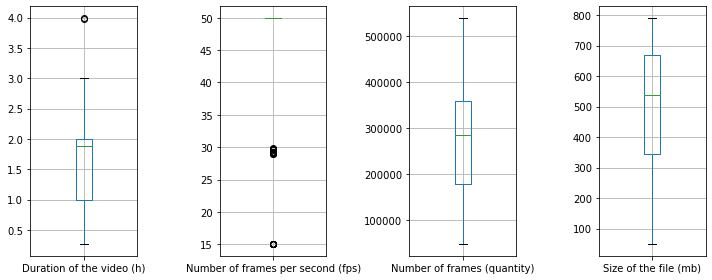

In [34]:
fig = plt.figure(figsize=(10,4))

sp = plt.subplot(1,4,1)
stats_df[["Duration of the video (h)"]].boxplot()

plt.subplot(1,4,2)
stats_df[["Number of frames per second (fps)"]].boxplot()

plt.subplot(1,4,3)
stats_df[["Number of frames (quantity)"]].boxplot()

plt.subplot(1,4,4)
stats_df[["Size of the file (mb)"]].boxplot()

plt.tight_layout()

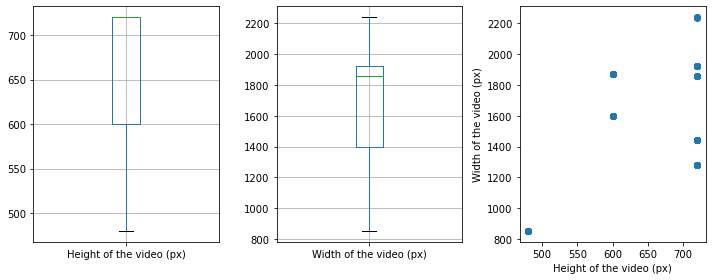

In [35]:
fig = plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
stats_df[["Height of the video (px)"]].boxplot()

plt.subplot(1,3,2)
stats_df[["Width of the video (px)"]].boxplot()

plt.subplot(1,3,3)
plt.scatter(stats_df["Height of the video (px)"], stats_df["Width of the video (px)"])
plt.xlabel("Height of the video (px)")
plt.ylabel("Width of the video (px)")

plt.tight_layout()